### Import

In [7]:
import cv2
import os
import matplotlib.pyplot as plt
import csv

### 이미지 면적 대비 건물 영역 분석

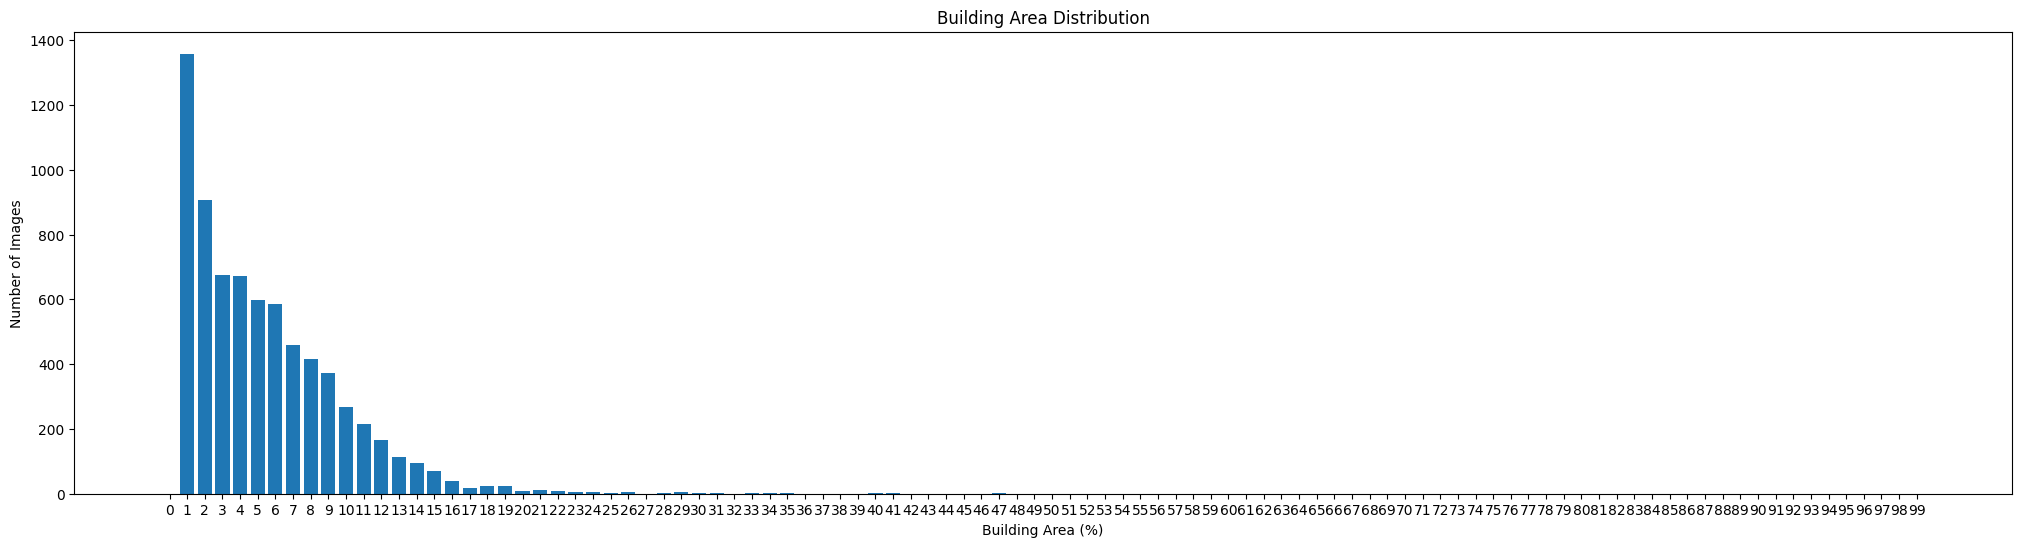

In [8]:
csv_file = './data/train.csv'

area_count = [0] * 100

with open(csv_file, 'r') as f:
    csv_reader = csv.reader(f)
    header = next(csv_reader)
    
    for row in csv_reader:
        img_id, img_path, mask = row[0], row[1], row[2]
        
        # 마스크 이미지 경로 수동 구성
        rle_mask_path = os.path.join('./data/', img_path.replace("train_img","mask_img"))

        image = cv2.imread(rle_mask_path, cv2.IMREAD_GRAYSCALE)
        height, width = image.shape
        all_pixel = height * width
        white_pixel = cv2.countNonZero(image)
        ratio = (white_pixel / all_pixel) * 100.0

        unit = int(ratio)
        area_count[unit] += 1

plt.figure(figsize=(25, 6))
x = range(0, 100, 1)
y = area_count

plt.bar(x, y)
plt.xlabel('Building Area (%)')
plt.ylabel('Number of Images')
plt.xticks(x)
plt.title('Building Area Distribution')
plt.show()
